In [1]:
import pandas as pd

In [2]:
gps_data = pd.read_csv('capture.csv')
gps_data_2 = pd.read_csv('capture_2.csv')

In [3]:
 gps_data[:100]

,time,seconds,status,lat,lon,delta_lat,delta_lon,distance,bearing,speed,track
0,22:40:18,0,A,33.779085,-118.418300,0.000000,0.000000,0.000000,0.000000,0.29,37.22
1,22:40:19,1,A,33.779085,-118.418300,0.000000,0.000000,0.000000,0.000000,0.00,37.22
2,22:40:20,2,A,33.779085,-118.418300,0.000000,0.000000,0.000000,0.000000,0.00,37.22
3,22:40:21,3,A,33.779080,-118.418303,-0.555975,-0.308079,0.635626,208.991934,0.44,37.22
4,22:40:22,4,A,33.779082,-118.418302,-0.370650,-0.154040,0.401384,202.567466,0.45,37.22
...,...,...,...,...,...,...,...,...,...,...,...
95,22:41:53,95,A,33.778767,-118.418982,-35.397052,-63.002479,72.265129,240.671305,2.43,204.10
96,22:41:54,96,A,33.778753,-118.418988,-36.879651,-63.618650,73.535200,239.899328,2.69,201.74
97,22:41:55,97,A,33.778742,-118.418990,-38.176925,-63.772699,74.326432,239.093691,2.65,196.42
98,22:41:56,98,A,33.778730,-118.418993,-39.474199,-64.080788,75.263157,238.366790,2.31,194.31


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]

(-114.45784103416922, 39.26275384409611, -70.18860184060387, 83.53199303766146)

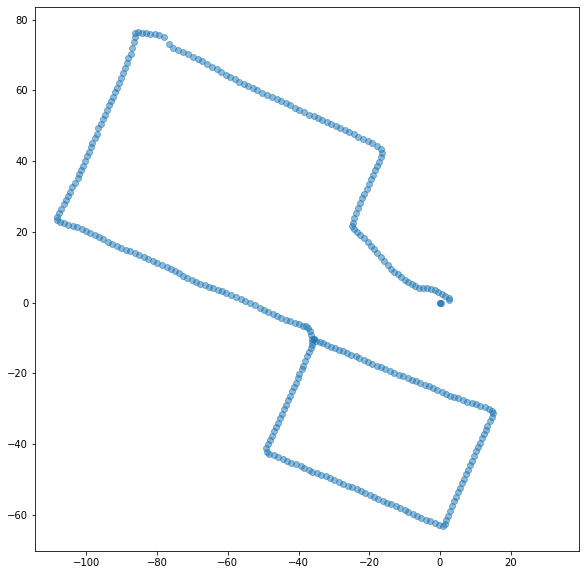

In [6]:
plt.scatter(gps_data_2.delta_lon, gps_data_2.delta_lat, alpha=0.5)
plt.axis('square')

(-114.54371419384923, 41.20397523118611, -70.28072689031771, 85.46696253471762)

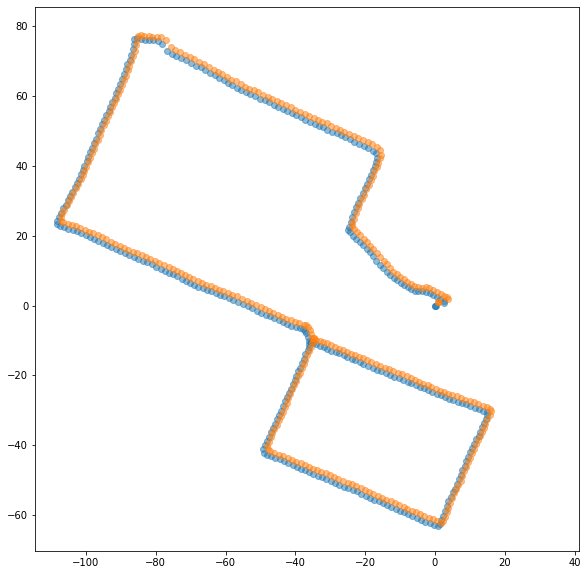

In [16]:
import nav_math
import math
from nav_math import get_distance_and_bearing

cur_x = 0
cur_y = 0

dead_recogning_data = []

for index, row in gps_data_2.iterrows():
    if index == 0:
        cur_lat = gps_data_2['lat'].iloc[0]
        cur_lon = gps_data_2['lon'].iloc[0]
    else:
        distance, bearing = get_distance_and_bearing(cur_lat, cur_lon, row['lat'], row['lon'])
        cur_x += distance * math.cos(nav_math.degrees_to_radians(nav_math.compass_to_trig(bearing)))
        cur_y += distance * math.sin(nav_math.degrees_to_radians(nav_math.compass_to_trig(bearing)))
        cur_lat = row['lat']
        cur_lon = row['lon']
        
    dead_recogning_data.append((cur_x, cur_y))
    
#print(dead_recogning_data)
dead_recogning_data_frame = pd.DataFrame.from_records(dead_recogning_data, columns=['X', 'Y'])
#dead_recogning_data_frame.head()
plt.scatter(dead_recogning_data_frame.X, dead_recogning_data_frame.Y, alpha=0.5)
plt.scatter(gps_data_2.delta_lon+1, gps_data_2.delta_lat+1, alpha=0.5)
plt.axis('square')

In [23]:
for index, row in gps_data_2.iterrows():
    delta_x = row['delta_lon'] - dead_recogning_data_frame['X'].iloc[index]
    delta_y = row['delta_lat'] - dead_recogning_data_frame['Y'].iloc[index]
    print(delta_x, delta_y)

0.0 0.0
0.0 0.0
-2.3516866232142775e-09 -1.4146461715668569e-09
-1.4210684184945421e-08 -3.207319464459957e-07
-1.6467117092133776e-07 -3.2196442689702565e-07
-3.0872705414353163e-07 -3.671200614618897e-07
-4.0102793530394365e-07 -4.1201600708973274e-07
-4.324954224199651e-07 -4.734480079093828e-07
-4.101392880873078e-07 -5.336139148326424e-07
-3.4788771463567514e-07 -5.954891721948741e-07
-2.460263015535702e-07 -6.566571082444739e-07
-3.201694003251987e-07 -7.185233714679384e-07
-2.2245763542372288e-07 -7.790155791553843e-07
2.9367006604275048e-09 -8.401835147608949e-07
4.075340331866073e-07 -8.850794666059869e-07
8.637022066437794e-07 -9.448174393966724e-07
1.5612089274696928e-06 -9.913342262635183e-07
2.3286024113389203e-06 -1.052230409470667e-06
3.1796149215779224e-06 -1.0973325537122491e-06
4.10521763960503e-06 -1.1596433875382672e-06
5.361854059415805e-06 -1.2029314220285414e-06
6.980163055558819e-06 -1.2465338752321031e-06
8.418987194502847e-06 -1.2926512074074026e-06
1.02532353

-0.0006969200358426519 -1.309047571140809e-05
-0.0006991591679863518 -1.3170662107597764e-05
-0.000701326216137943 -1.3231814634195871e-05
-0.0007027313233152199 -1.3311724984532702e-05
-0.0007047610296240236 -1.3390616366848462e-05
-0.0007060678736579007 -1.3471234048267888e-05
-0.0007079561972851423 -1.3551126585298334e-05
-0.0007097748065625353 -1.3630725277380407e-05
-0.0007115170441132079 -1.3710911666464654e-05
-0.0007131894347871537 -1.3790510351441299e-05
-0.0007147925077148898 -1.3891927501674672e-05
-0.0007158031740637227 -1.3971513531885194e-05
-0.0007172509055521914 -1.4051406090231922e-05
-0.0007181681100014714 -1.4131316426357898e-05
-0.0007199065841803076 -1.4211188990032042e-05
-0.000721138515711317 -1.4291081527062488e-05
-0.0007222985139634375 -1.4370974064092934e-05
-0.0007233864464026851 -1.4450572734858724e-05
-0.0007244027107553563 -1.4530759131048399e-05
-0.0007253466441934364 -1.4610063963971243e-05
-0.0007259281599605316 -1.4689974321413501e-05
-0.0007267261405

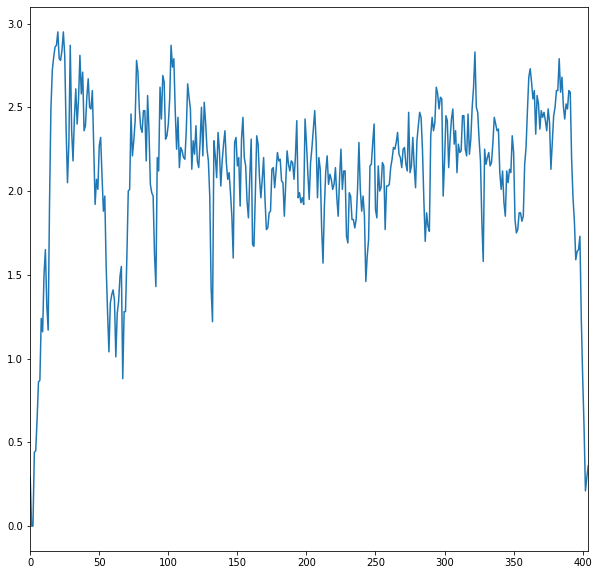

In [9]:
gps_data.speed.plot()

(-97.69119998504601,
 -18.1746861530291,
 -117.78003044492812,
 -38.263516612911204)

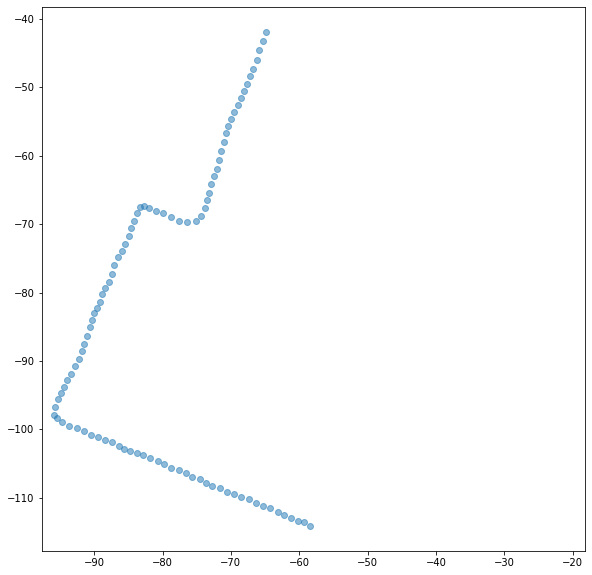

In [47]:
gps_data_slice = gps_data[100:200]
plt.scatter(gps_data_slice.delta_lon, gps_data_slice.delta_lat, alpha=0.5)
plt.axis('square')

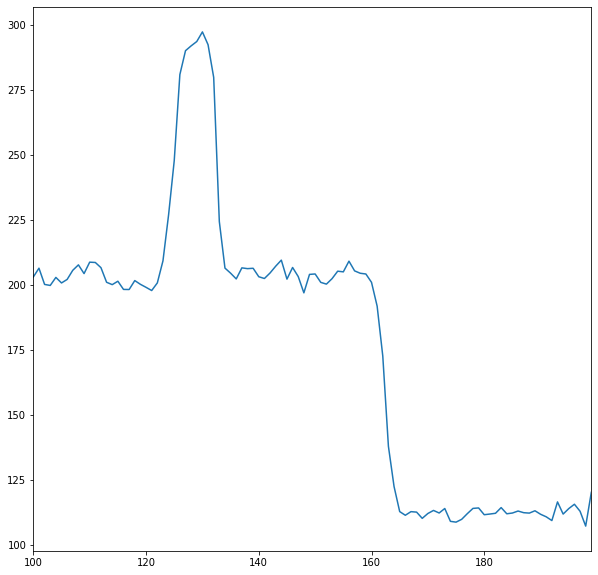

In [48]:
gps_data_slice.track.plot()

In [10]:
gps_data_2 = pd.read_csv('capture_2.csv')

(-114.45784103416922, 39.26275384409611, -70.18860184060387, 83.53199303766146)

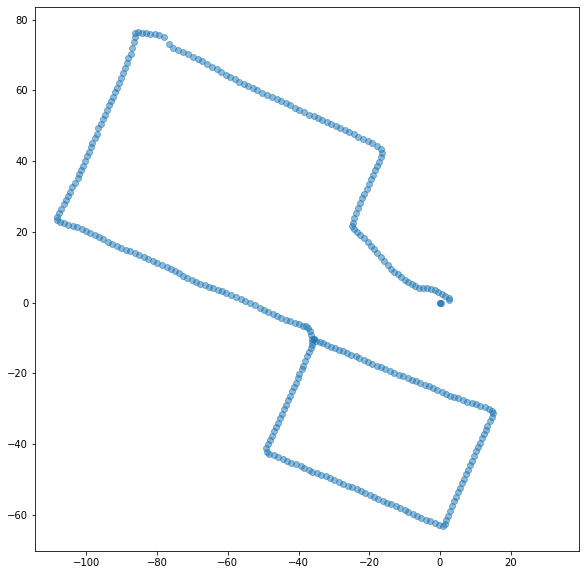

In [11]:
plt.scatter(gps_data_2.delta_lon, gps_data_2.delta_lat, alpha=0.5)
plt.axis('square')

In [23]:
gps_data_kd = pd.read_csv('capture_kd.csv')
gps_data_bs = pd.read_csv('capture_bs.csv')
gps_data_ez = pd.read_csv('capture_ez.csv')
gps_data_le = pd.read_csv('capture_le.csv')

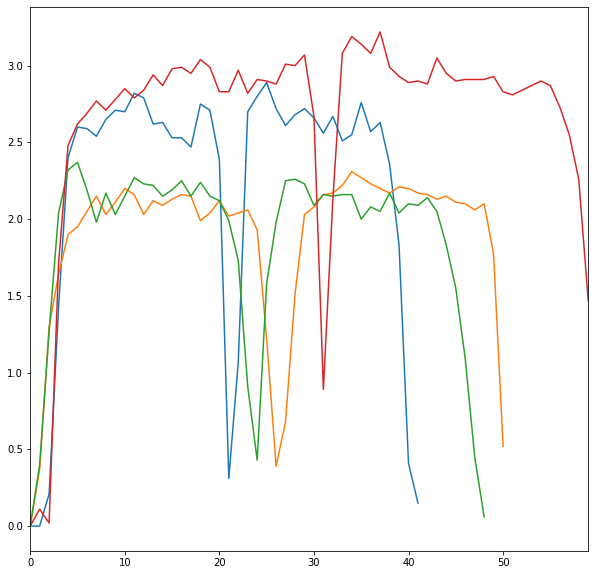

In [24]:
gps_data_kd.speed.plot()
gps_data_bs.speed.plot()
gps_data_ez.speed.plot()
gps_data_le.speed.plot()